# 2차원 벡터

# 평면의 각과 삼각법

## 파이썬에서의 라디안(Radians) 과 삼각형

In [ ]:
from math import tan
tan(45)

1.6197751905438615

In [ ]:
from math import tan, pi
tan(pi/4) 

0.9999999999999999

In [31]:
from math import sin, cos
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

In [ ]:
# 극 좌표계 5, 37도의 데카르트 좌표계를 구해보자.
angle= ??
to_cartesian( (5, angle) )

(3.993177550236464, 3.0090751157602416)

In [33]:
from math import asin
sin(1)

0.8414709848078965

In [34]:
asin(0.8414709848078965)

1.0

In [35]:
# trying to find an angle with sin = 3/sqrt(13)
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [36]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [37]:
cos(2.1587989303424644)

-0.5547001962252293

In [38]:
-2/sqrt(13)

-0.5547001962252291

In [39]:
sin(2.1587989303424644)

0.8320502943378436

In [40]:
3/sqrt(13)

0.8320502943378437

In [41]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [42]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [43]:
to_polar((1,0))

(1.0, 0.0)

In [44]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [45]:
length((-1.34,2.68))

2.9963310898497184

**EXERCISE:** What is $116.57^\circ$ in radians?  Use Python to compute the tangent of this angle, and confirm that it is close to $-2$ as we saw above.

**SOLUTION:** $116.57^\circ · (1 \text{rad} / 57.296^\circ) = 2.035 \text{rad}.$

In [46]:
tan(2.035)

-1.9972227673316139

**EXERCISE:** Locate the angle $10\pi/6$.  Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative?  Use Python to calculate their values and confirm.

**SOLUTION:** The angle $\pi/6$ is one third of a quarter-turn, so $10\pi/6$ is less than a quarter turn short of a full rotation.  This means that it points "down and to the right".  The cosine should be positive and the sine should be negative, since distance in this direction corresponds with positive horizontal displacement and negative vertical displacement.

In [47]:
sin(10*pi/6)

-0.8660254037844386

In [48]:
cos(10*pi/6)

0.5

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.  

In [49]:
polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]

In Python code, convert them to cartesian coordinates, and connect them in a closed loop with line segments to draw a picture.

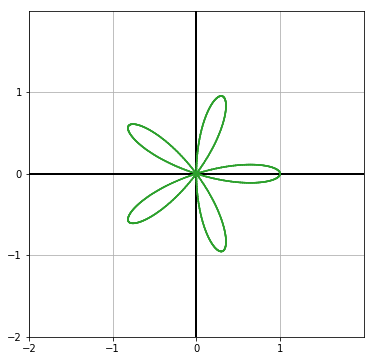

In [50]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**EXERCISE:** Find the angle to get to the point (-2,3) by “guess-and-check”.  

In [51]:
# we want to make guesses between pi/2 and pi
pi, pi/2

(3.141592653589793, 1.5707963267948966)

In [52]:
tan(1.8)

-4.286261674628062

In [53]:
tan(2.5)

-0.7470222972386602

In [54]:
tan(2.2)

-1.3738230567687948

In [55]:
tan(2.1)

-1.7098465429045078

In [56]:
tan(2.15)

-1.5289797578045667

In [57]:
tan(2.16)

-1.4961035416162771

In [58]:
tan(2.155)

-1.5124173422757465

In [59]:
tan(2.156)

-1.50913489938793

In [60]:
tan(2.157)

-1.505862348872722

In [61]:
tan(2.158)

-1.5025996395625056

In [62]:
# we conclude the angle is between 2.158 and 2.159.
tan(2.159)

-1.4993467206361923

**EXERCISE:**  Find another point in the plane with the same tangent as $\theta$, that is $-3/2$.  Use Python’s implementation of the arctangent function, `math.atan`, to find the value of this angle.

In [63]:
from math import atan

In [64]:
atan(-3/2)

-0.982793723247329

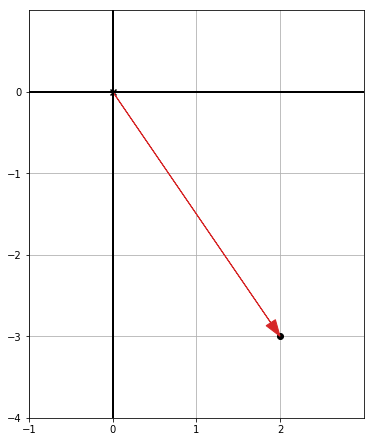

In [65]:
# this is the direction to the point (2,-3).  
# tan(-3/2) = tan(-1.5) = tan(3/-2)
draw(Arrow((2,-3)), Points((2,-3)))

**EXERCISE:** Without using Python, what are polar coordinates corresponding to the cartesian coordinates $(1,1)$ and $(1,-1)$?  Once you’ve found the answers, use to_polar to check your work.

**SOLUTION:** The answers should be $(\sqrt{2},\pi/4)$ and $(\sqrt{2},-\pi/4)$.

In [66]:
to_polar((1,1))

(1.4142135623730951, 0.7853981633974483)

In [67]:
to_polar((1,-1))

(1.4142135623730951, -0.7853981633974483)

In [68]:
#compare to
(sqrt(2), pi/4)

(1.4142135623730951, 0.7853981633974483)

In [69]:
(sqrt(2), -pi/4)

(1.4142135623730951, -0.7853981633974483)

# Transforming collections of vectors

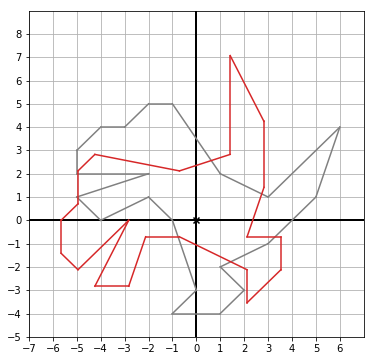

In [70]:
rotation_angle = pi/4

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**EXERCISE:** Create a `rotate(angle, vectors)` function which takes an array of input vectors in cartesian coordinates and returns them by the specified angle (counterclockwise or clockwise according to whether the angle is positive or negative). 

In [71]:
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

## Combining vector transformations

In [72]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

**EXERCISE:** Create a function `polygon(n)` which returns cartesian coordinates of a regular $n$-sided polygon (that is, having all angles and side lengths equal).  For instance, `polygon(7)` could produce vectors defining a heptagon.

In [73]:
def regular_polygon(n):
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

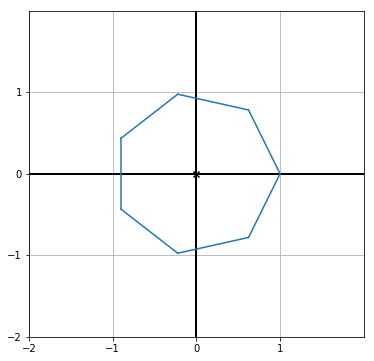

In [74]:
draw(
    Polygon(*regular_polygon(7))
)